# **Project Name - Cardiovascular Risk Prediction**

##### **Project Type**    - Supervised Machine Learning (Classification)
##### **Contribution**    - Individual

# **Project Summary**

write in 400-500 words here..

# **GitHub Link** 

Paste GitHub Link Here

# **Problem Statement**

**BUSINESS PROBLEM OVERVIEW**


The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10 year risk of future coronary heart disease(CHD). The dataset provides the patients information. It includes over 4000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

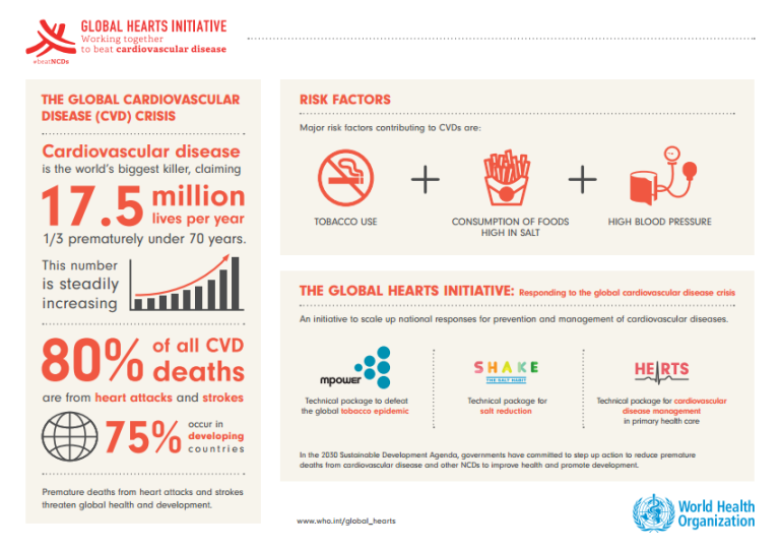

## <b> Data Description </b>

### <b>The dataset is from ongoing cardiovascular study on people of the town Framingham, Massachusetts. The dataset provides the patients information(Sex, Age, is_smoking, cigs_per_day, BP_Meds, Prevalent Stroke, Prevalent hyp, Diabetes, Tot Chol, Sys BP, Dia BP, BMI, Heart Rate)</b>


### <b>Attribute Information: </b>

* #### age - Patient's age.
* #### education - Patient's education.
* #### sex : gender(Male or Female).
* #### is_smoking - currently patient is a smoker or not.
* #### cigsPerDay - Cigarettes smoked per day by patient.
* #### BPMeds - Patient taking BP meds or not.
* #### prevalentStroke - If the patient has the history of stroke.
* #### prevalentHyp - If the patient has the history of hypertention.
* #### diabetes - Patient has diabetes or not.
* #### totChol - Total cholestrol level.
* #### sysBP - Blood Pressure measure.
* #### diaBP - Blood Pressure measure.
* #### BMI - Patient's body mass index.
* #### heartRate - Heart Rate measure.
* #### glucose - Glucose Level.
* #### TenYearCHD - Future 10 year risk of CHD("0" means No and "1" means Yes.)

# ***Let's Begin !***

## Importing Libraries

In [1]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [3]:
# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## Mounting drive and Loading Dataset

In [4]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Loading the dataset
working_dir = '/content/drive/MyDrive/Almabetter/Capstone Projects/Cardiovascular Risk Prediction - Anas Malik/dat/'
dataset = pd.read_csv(working_dir + 'data_cardiovascular_risk.csv')

# Data Inspection

## Dataset Rows & Columns

In [7]:
# Shape of the dataset
dataset.shape

(3390, 17)

## Dataset First View

In [9]:
# viewing the data of top 5 rows
dataset.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


## Dataset Information

In [10]:
# dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

## Duplicate Values

In [11]:
# Duplicate rows in dataset
dataset.duplicated().sum()

0

## Missing Values/Null Values

In [12]:
# Missing values count
dataset.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

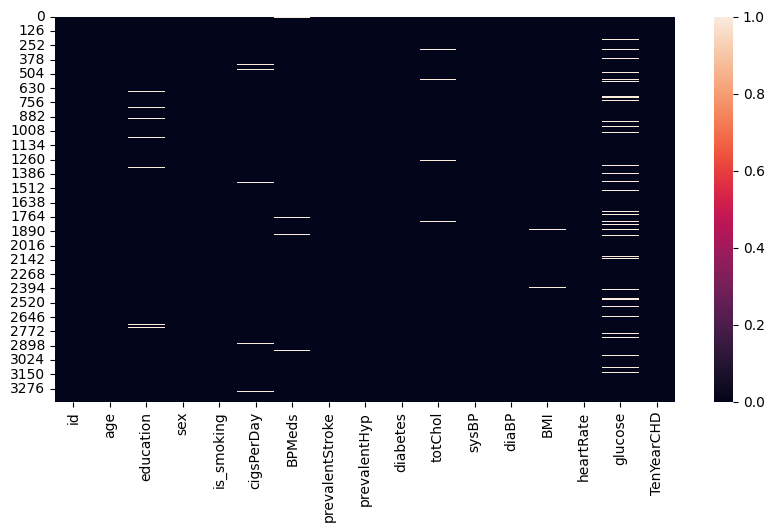

In [13]:
# Visualizing the null values by plotting heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(dataset.isnull())

## What did I understand about the Dataset ?

The given dataset is a dataset from Framingham, Massachusetts. The dataset contains the patient information. We need to predict whether the patient has a risk of coronary heart disease in future 10 years.

The given dataset has 3390 rows and 17 columns. There are no duplicated entries. There are missing values present in dataset that need to be handle.

## Understanding Variables/Features

In [14]:
# Columns in the dataset
dataset.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [15]:
# Dataset Description
dataset.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


### Features Description

* **age :** Age of the patient(Continuous).
* **education :** Qualifications of the Patient(Continous).
* **sex :** Gender of patient(Categorical).
* **is_smoking :** Currently patient is a smoker or not(Categorical).
* **cigsPerDay :** Number of cigarettes consumed by the patient on daily baisis(Continous).
* **BPMeds :** If patient taking BP Meds or not(Categorical).
* **prevalentStroke :** If patient has history of stroke(Categorical).
* **prevalentHyp :** If the patient has history of hypertention(Categorical).
* **diabetes :** Patient has diabetes or not(Categorical).
* **totChol :** Total cholestrol level of patient(Continuous).
* **sysBP :** Blood pressure measure(Continuous).
* **diaBP :** Blood pressure measure(Continuous).
* **BMI :** Body Mass Index of the patient(Continuous).
* **heartRate :** Heart Rate measure of patient(Continuous).
* **glucose :** Glucose level of patient(Continuous).
* **TenYearCHD :** 10 year risk of CHD(Categorical).

**TenYearCHD is the target variable.**

In [16]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print(f"No. of unique values in {i} is {dataset[i].nunique()}")

No. of unique values in id is 3390
No. of unique values in age is 39
No. of unique values in education is 4
No. of unique values in sex is 2
No. of unique values in is_smoking is 2
No. of unique values in cigsPerDay is 32
No. of unique values in BPMeds is 2
No. of unique values in prevalentStroke is 2
No. of unique values in prevalentHyp is 2
No. of unique values in diabetes is 2
No. of unique values in totChol is 240
No. of unique values in sysBP is 226
No. of unique values in diaBP is 142
No. of unique values in BMI is 1259
No. of unique values in heartRate is 68
No. of unique values in glucose is 132
No. of unique values in TenYearCHD is 2
